In [1]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import tensorflow_probability as tfp
tfd = tfp.distributions

# Data Viz. 
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

# Get TensorFlow version.
print(f'TnesorFlow version: {tf.__version__}')
print(f'TnesorFlow Probability version: {tfp.__version__}')

2022-06-20 13:31:22.477948: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-20 13:31:22.477963: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TnesorFlow version: 2.9.1
TnesorFlow Probability version: 0.17.0-dev20220525


In [2]:
import numpy as np
import pandas as pd

import arviz as az
import corner

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp

tf.enable_v2_behavior()

tfd = tfp.distributions
tfb = tfp.bijectors

In [4]:
import bilby

from bilby.core.prior import Uniform
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

from gwpy.timeseries import TimeSeries

In [5]:
label = 'GW150914'
time_of_event = bilby.gw.utils.get_event_time(label)

In [6]:
H1 = bilby.gw.detector.get_empty_interferometer("H1")
L1 = bilby.gw.detector.get_empty_interferometer("L1")

In [7]:
H1_data = TimeSeries.fetch_open_data("H1", time_of_event, 
                                     time_of_event + 2,
                                     sample_rate=4096, cache=True)

L1_data = TimeSeries.fetch_open_data("L1", time_of_event, 
                                     time_of_event + 2,
                                     sample_rate=4096, cache=True)

In [8]:
H1.set_strain_data_from_gwpy_timeseries(H1_data)
L1.set_strain_data_from_gwpy_timeseries(L1_data)

In [9]:
interferometers = [H1, L1]

In [10]:
prior = {}
prior['mass_ratio'] = 0.977647
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694
prior['psi'] =  0.532268
prior['luminosity_distance'] = 412.066
prior['phase'] =  5.30408
prior['geocent_time'] = 1126259462.4146729

prior['chirp_mass'] = Uniform(
    name='chirp_mass',
    latex_label='$M$',
    minimum=250.0,
    maximum=350.0,
    unit='$M_{\\odot}$')

prior = {}
prior['chirp_mass'] = Uniform(name='chirp_mass', minimum=3.0,maximum=32.5)
prior['mass_ratio'] = Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.1, maximum=time_of_event+0.1)
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694
prior['psi'] =  0.532268
prior['luminosity_distance'] = 412.066


In [11]:
prior_dict = bilby.core.prior.PriorDict(prior)

In [12]:
example = prior_dict.sample()

In [13]:
log_p = prior_dict.ln_prob(example)

In [14]:
waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                          reference_frequency=100.)

waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

13:31 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [15]:
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers,
    waveform_generator,
    priors=prior)

In [16]:
w = waveform_generator.frequency_domain_strain(example)

/home/auratrik/Anaconda33/envs/igwn-py39-lw/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


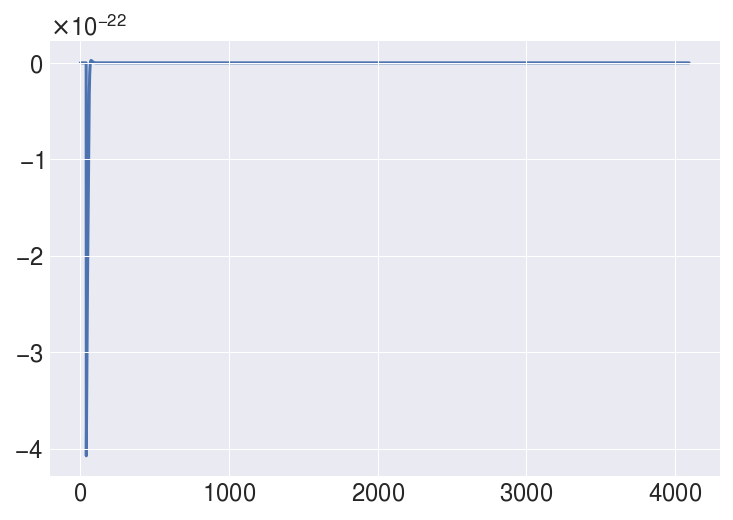

In [17]:
plt.plot(w['plus'])

In [18]:
likelihood.parameters.update(example)
log_l = likelihood.log_likelihood() 
log_post = log_p + log_l

13:31 bilby INFO    : Generating frequency domain strain from given time domain strain.
13:31 bilby INFO    : Applying a tukey window with alpha=0.2, roll off=0.2
13:31 bilby INFO    : Generating frequency domain strain from given time domain strain.
13:31 bilby INFO    : Applying a tukey window with alpha=0.2, roll off=0.2


In [19]:
print(log_post)

-153545492.3487472


2022-06-20 13:31:43.550210: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-20 13:31:43.550253: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (auratrik-Lenovo-Legion-5-15IMH05): /proc/driver/nvidia/version does not exist
2022-06-20 13:31:43.551137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


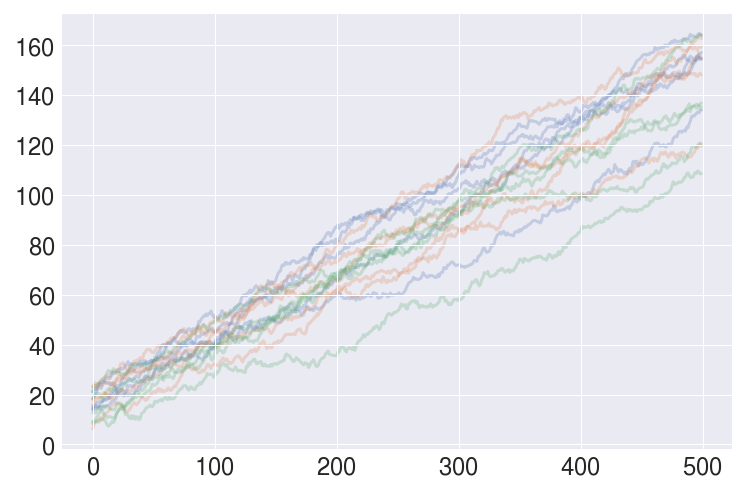

In [20]:
ndim = 3
nsample, nchain = 500, 5

def target_log_prob(log_post):
    #mean, var= tf.nn.moments(x, axes = [0, 1], keepdims = True)
    #return -tf.reduce_sum(((2*np.pi*var)**(-0.5))*np.exp((-(x - mean)**2)/(2*var)))
    return tf.convert_to_tensor(log_post)

hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn=target_log_prob,
    num_leapfrog_steps=3,
    step_size=.25)

samples, is_accepted = tfp.mcmc.sample_chain(
    kernel=hmc_kernel,
    num_results=nsample,
    num_burnin_steps=50,
    trace_fn=lambda _, pkr: pkr.is_accepted,
    current_state=tf.zeros([nchain, ndim]))

for i in range(ndim):
  plt.plot(samples[..., i], alpha=.25, color=f'C{i}');
#plt.plot(samples[..., 1], alpha=.25, color=f'C{i}');

In [21]:
print(samples)

tf.Tensor(
[[[ 18.353592    6.2413416  18.549068 ]
  [ 21.077053   16.091637    9.15328  ]
  [ 15.342459   17.77056    21.22261  ]
  [ 13.903147   23.237982    8.362781 ]
  [ 14.151204   22.96005    12.694401 ]]

 [[ 18.623032    7.8050423  19.067583 ]
  [ 21.810614   15.923626    9.020208 ]
  [ 14.338989   17.914005   22.27965  ]
  [ 15.214548   24.111738    9.530673 ]
  [ 14.700037   23.45186    13.0170355]]

 [[ 20.31611     8.614792   19.80068  ]
  [ 22.650639   17.128586    8.859164 ]
  [ 14.134598   19.130129   23.537699 ]
  [ 15.445012   24.79602     9.7941675]
  [ 15.322847   23.904177   12.603309 ]]

 ...

 [[164.76672   120.10595   163.93684  ]
  [154.90607   159.62097   109.264595 ]
  [132.93121   148.41196   135.8596   ]
  [155.26868   156.61197   120.46584  ]
  [156.8127    163.90875   135.89166  ]]

 [[164.63324   120.32078   164.42134  ]
  [155.1717    159.53871   108.48443  ]
  [133.7865    148.90428   136.6243   ]
  [154.46004   155.91086   120.79669  ]
  [156.60341   

In [22]:
sample_mean = tf.reduce_mean(samples, axis=0)
print(sample_mean)


tf.Tensor(
[[92.10695  67.503105 85.29423 ]
 [90.44647  83.387    53.587032]
 [68.42636  79.39878  81.24701 ]
 [91.39213  84.76633  71.526215]
 [82.5722   93.84142  77.32124 ]], shape=(5, 3), dtype=float32)


/home/auratrik/Anaconda33/envs/igwn-py39-lw/lib/python3.9/site-packages/arviz/data/base.py:220: UserWarning: More chains (500) than draws (5). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


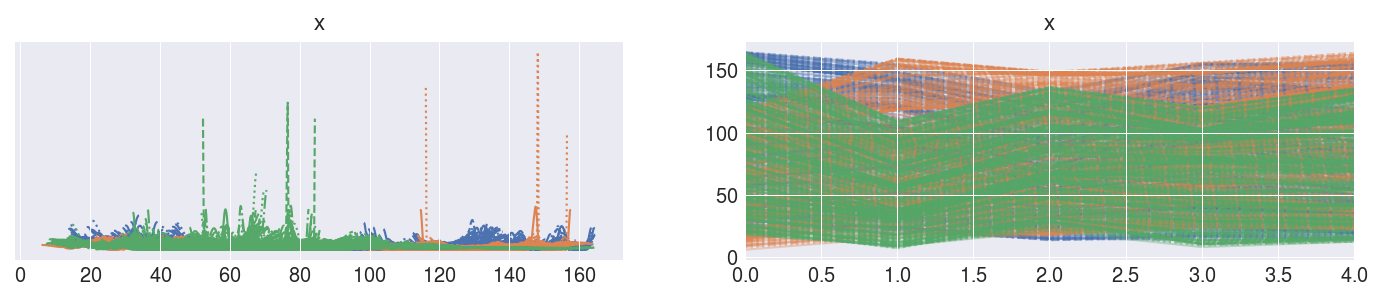

In [23]:
az.plot_trace(samples.numpy());

In [24]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

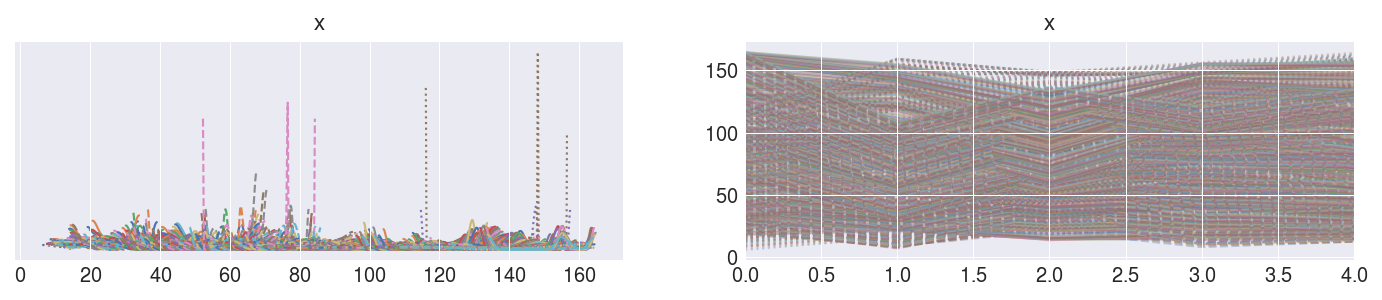

In [25]:
az.plot_trace(np.asarray(samples).T);

In [26]:
chains_df = pd.DataFrame([t.numpy() for t in samples[i]])
chains_df = chains_df.T.melt(var_name='chain_id', value_name='sample')
chains_df.head()

,chain_id,sample
0,0,20.316111
1,0,8.614792
2,0,19.800680
3,1,22.650639
4,1,17.128586


/home/auratrik/Anaconda33/envs/igwn-py39-lw/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/auratrik/Anaconda33/envs/igwn-py39-lw/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/auratrik/Anaconda33/envs/igwn-py39-lw/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

IndexError: list index out of range

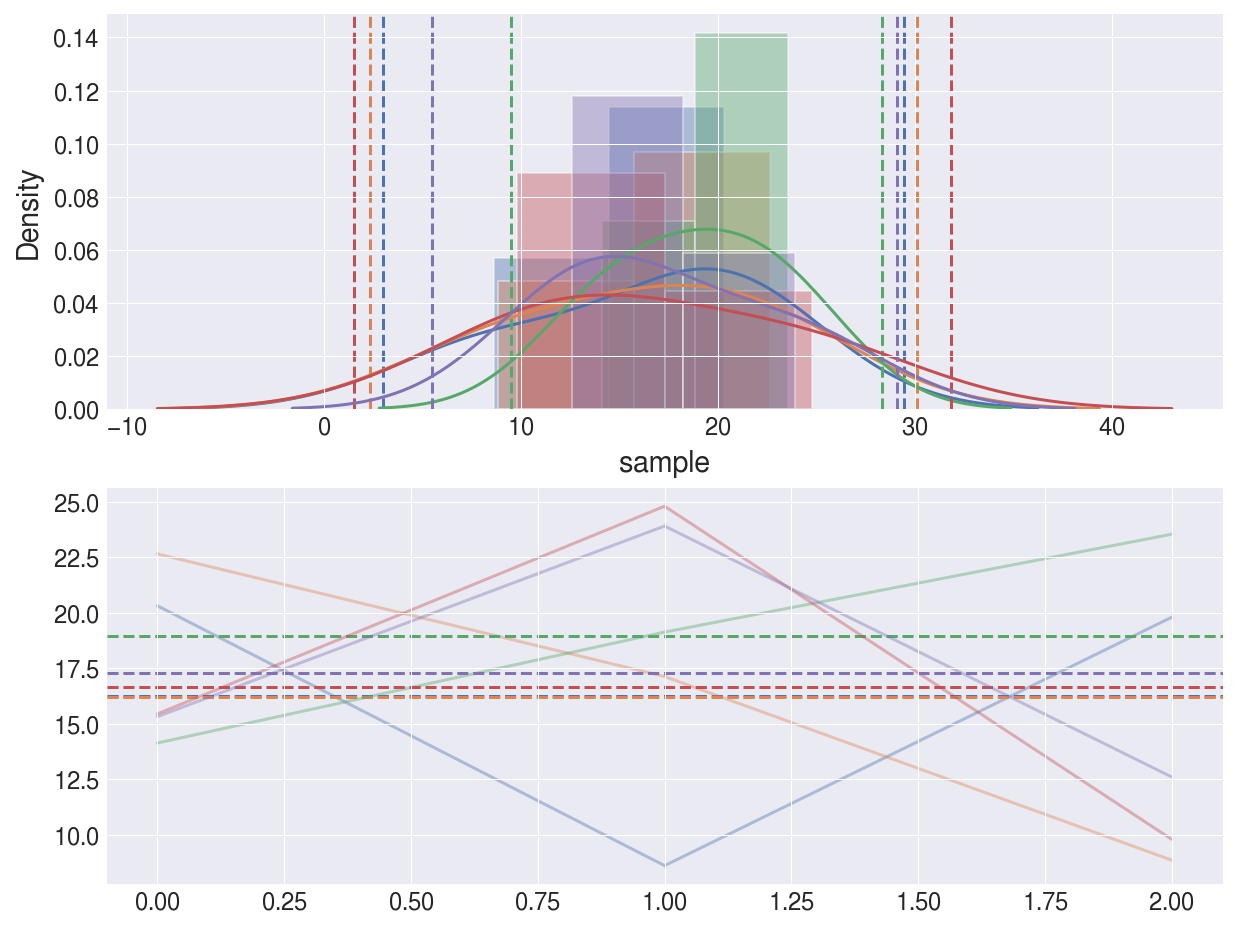

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

for i in range(500):
    chain_samples = chains_df \
        .query(f'chain_id == {i}') \
        .reset_index(drop=True) \
        ['sample']

    chain_samples_mean = chain_samples.mean()
    chain_samples_std = chain_samples.std()
    chain_samples_plus = chain_samples_mean + 2*chain_samples_std
    chain_samples_minus = chain_samples_mean - 2*chain_samples_std

    sns.distplot(a=chain_samples, color=sns_c[i], hist_kws={'alpha': 0.4}, label=f'chain_{i}', ax=ax[0])
    ax[0].axvline(x=chain_samples_plus, linestyle='--', color=sns_c[i], label=f'chain_{i}_plus = {chain_samples_plus: 0.2f}')
    ax[0].axvline(x=chain_samples_minus, linestyle='--', color=sns_c[i], label=f'chain_{i}_minus = {chain_samples_minus: 0.2f}')
    ax[1].plot(chain_samples, c=sns_c[i], alpha=0.4)
    ax[1].axhline(y=chain_samples_mean, linestyle='--', color=sns_c[i], label=f'chain_{i} mean = {chain_samples_mean: 0.2f}')

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set(xlabel='rate', ylabel='')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].set(xlabel='sample', ylabel='rate')

result_mc = bilby.run_sampler(log_l,
                              log_p,
                              sampler='dynesty',
                              outdir='short_mc_only',
                              walks=5,
                              nlive=50,
                              label=label)

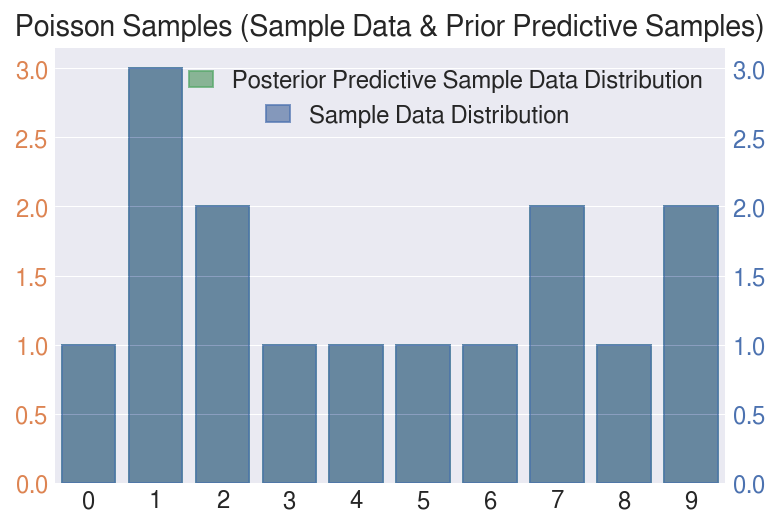

In [28]:
y_post_pred = tfd.Poisson(rate=chains_df['sample']).sample(1)
y_post_pred  = tf.reshape(y_post_pred, [-1])

y_range_prior, idy_prior, c_prior = tf.unique_with_counts(y_post_pred)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 
sns.barplot(
    x=y_range_prior.numpy(), 
    y=c_prior.numpy(), 
    color=sns_c[0], 
    edgecolor=sns_c[0], 
    alpha=0.7, 
    label='Sample Data Distribution', 
    ax=ax2
)
sns.barplot(
    x=y_range_prior.numpy(), 
    y=c_prior.numpy(), 
    color=sns_c[2], 
    edgecolor=sns_c[2], 
    label='Posterior Predictive Sample Data Distribution', 
    alpha=0.7, 
    ax=ax1
)
ax1.set(title=f'Poisson Samples (Sample Data & Prior Predictive Samples)')
ax1.tick_params(axis='y', labelcolor=sns_c[1])
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.legend(loc='upper right')
ax2.grid(None)
ax2.legend(bbox_to_anchor=(0.8, 0.92))
ax2.tick_params(axis='y', labelcolor=sns_c[0])